<a href="https://colab.research.google.com/github/KaniaruIvy/Machine-Learning-Group-Assignments/blob/main/Machine_Learning_Class_Task_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# You are provided with the Housing Pricing dataset.

1. Prepare a dataset description file
2. Prepare the dataset for training
3. Fill in Missing Values
4. Encode the dataset
5. Standardize the dataset
6. Perfom feature extraction using PCA
7. Perform feature selection using L1
8. Train a regression model using PCA with 2 components



## 1.Prepare the dataset for training

### Make the necessary imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics


### Get the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/modified_data.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## 2.Fill in missing values

### Search for missing values

In [5]:
data.drop('Id',axis=1,inplace=True)

In [6]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
data.shape

(1460, 76)

In [8]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [9]:
all_features=list(data.columns)
all_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [10]:
len(all_features)

76

In [11]:
features_missing_values=list(data.columns[data.isna().any()])
features_missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [12]:
len(features_missing_values)

15

Print the feature along with the number of values missing in that feature divided by the number of features*100

In [13]:
for feature in features_missing_values:
  print(feature,' ',(data[feature].isna().sum())/len(data)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [14]:
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)

### Fill the missing values

In [15]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_missing_values)-set(mean_fill)-set(bfill))

In [16]:
ffill

['BsmtFinType1',
 'BsmtFinType2',
 'GarageQual',
 'GarageFinish',
 'Electrical',
 'GarageYrBlt',
 'MasVnrType',
 'GarageType',
 'BsmtQual',
 'GarageCond',
 'BsmtCond',
 'BsmtExposure']

**pandas.DataFrame.fillna**
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)[source]
Fill NA/NaN values using the specified method.

> Parameters
valuescalar, dict, Series, or DataFrame
Value to use to fill holes (e.g. 0), alternately a dict/Series/DataFrame of values specifying which value to use for each index (for a Series) or column (for a DataFrame). Values not in the dict/Series/DataFrame will not be filled. This value cannot be a list.

> method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.




In [17]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [18]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)

In [19]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

Check for any features that may have missing values

In [20]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

## 3.Encode the dataset

Find out the datatypes present in the data

In [21]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

List data that is of type *'object'*

In [22]:
data_categories=data.select_dtypes(include=['object']).copy()
data_categories.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


List the columns of the data where type is *'object'*

In [23]:
category_features=list(data_categories.columns)
category_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Categories the features into their different classes

In [24]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(category_features)-set(nominal))
numerical=list(set(all_features)-set(category_features))
target=['SalePrice']

Encode the data according to their different types

In [25]:
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [26]:
df_nominal=pd.get_dummies(data[nominal])
df_ordinal=data[ordinal]
df_numerical=data[numerical]

In [47]:
encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)
encoded_data

,MSSubClass,1stFlrSF,YrSold,3SsnPorch,LotArea,PoolArea,BsmtFinSF1,BsmtFinSF2,TotRmsAbvGrd,SalePrice,...,BsmtFinType1,BsmtFinType2,GarageFinish,ExterCond,PavedDrive,Electrical,Condition1,ExterQual,CentralAir,Street
0,60,856,2008,0,8450,0,706,0,8,208500,...,2,5,1,4,2,4,2,2,1,1
1,20,1262,2007,0,9600,0,978,0,6,181500,...,0,5,1,4,2,4,1,3,1,1
2,60,920,2008,0,11250,0,486,0,6,223500,...,2,5,1,4,2,4,2,2,1,1
3,70,961,2006,0,9550,0,216,0,7,140000,...,0,5,2,4,2,4,2,3,1,1
4,60,1145,2008,0,14260,0,655,0,9,250000,...,2,5,1,4,2,4,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,953,2007,0,7917,0,0,0,7,175000,...,5,5,1,4,2,4,2,3,1,1
1456,20,2073,2010,0,13175,0,790,163,7,210000,...,0,4,2,4,2,4,2,3,1,1
1457,70,1188,2010,0,9042,0,275,0,9,266500,...,2,5,1,2,2,4,2,0,1,1
1458,20,1078,2010,0,9717,0,49,1029,5,142125,...,2,4,2,4,2,0,2,3,1,1


In [28]:
encoded_data.shape

(1460, 111)

## 4.Standardize the dataset

In [29]:
encoded_data.drop('SalePrice',axis=1,inplace=True)

In [30]:
X=encoded_data.to_numpy()

In [31]:
X[0]

array([6.000e+01, 8.560e+02, 2.008e+03, 0.000e+00, 8.450e+03, 0.000e+00,
       7.060e+02, 0.000e+00, 8.000e+00, 2.000e+00, 7.000e+00, 0.000e+00,
       1.000e+00, 2.003e+03, 2.003e+03, 1.710e+03, 1.960e+02, 1.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 5.000e+00, 6.500e+01, 8.560e+02,
       0.000e+00, 0.000e+00, 3.000e+00, 2.003e+03, 0.000e+00, 6.100e+01,
       0.000e+00, 1.000e+00, 5.480e+02, 1.500e+02, 8.540e+02, 2.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 8.000e+00,
       4.000e+00, 4.000e+00, 2.000e+00, 1.300e+01, 

In [32]:
X=StandardScaler().fit_transform(X)

In [33]:
X[0]

array([ 0.07337496, -0.79343379,  0.13877749, -0.11633929, -0.20714171,
       -0.06869175,  0.57542484, -0.28865283,  0.91220977,  0.78974052,
        0.65147924, -0.27020835,  1.10781015,  0.87866809,  0.98587121,
        0.37033344,  0.51141841, -0.21145358, -0.12024172,  0.31172464,
       -0.08768781, -0.51719981, -0.22937175, -0.45930254, -0.95122649,
       -0.75217584,  0.16377912,  1.05099379, -0.24106104,  0.21650316,
       -0.3593249 ,  1.22758538,  0.35100032, -0.94459061,  1.16185159,
       -1.5991111 , -0.08304548, -0.21585871, -0.10526316,  0.51813339,
       -0.41895507, -0.21235968, -0.18831089, -0.15899968,  0.33712564,
       -0.46873869, -0.26232433, -0.18238027, -0.05241424,  0.62276215,
       -0.10854037, -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,
        2.95522137, -0.19025216, -0.27116307, -0.23917551, -0.16124951,
       -0.10854037, -0.1863522 , -0.42683279, -0.07875671, -0.22941573,
       -0.16998114, -0.23595776, -0.28963792, -0.13199092, -0.23

In [34]:
X.shape

(1460, 110)

In [35]:
y=data[target]

In [36]:
y=y.to_numpy()

In [37]:
y.shape

(1460, 1)

In [38]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [39]:
y=StandardScaler().fit_transform(y)

In [40]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

## 5.Perform Feature extraction using PCA

In [41]:
pca=PCA(n_components=2)

In [42]:
p_components=pca.fit_transform(X)

In [43]:
p_components

array([[ 2.40853194, -1.32904146],
       [ 0.43196163,  2.62162228],
       [ 2.82844136, -0.8541628 ],
       ...,
       [ 1.25988457, -0.86553734],
       [-2.83065744,  3.18170989],
       [-0.75664282,  2.68171626]])

In [44]:
pca.explained_variance_ratio_

array([0.10207313, 0.04345606])

Visualize the data

In [45]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.408532,-1.329041,0.347273
1,0.431962,2.621622,0.007288
2,2.828441,-0.854163,0.536154
3,-1.364215,0.551246,-0.515281
4,5.311981,-0.221937,0.869843
...,...,...,...
1455,1.306603,-2.289603,-0.074560
1456,1.095839,3.177273,0.366161
1457,1.259885,-0.865537,1.077611
1458,-2.830657,3.181710,-0.488523


## 6.Perform feature selection using L1

In [48]:
X_select = encoded_data.drop("SalePrice",1) 
y_select = encoded_data["SalePrice"]
regressor=LassoCV()
regressor.fit(X_select,y_select)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


LassoCV()

In [49]:
new_x = PowerTransformer().fit_transform(encoded_data)

test_data = pd.DataFrame(new_x,columns=encoded_data.columns)
test_data = pd.concat([test_data[ordinal],test_data[numerical],test_data[target]],axis=1)
test_data

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,GarageQual,Utilities,SaleType,FireplaceQu,SaleCondition,BsmtQual,Exterior2nd,BsmtCond,RoofMatl,KitchenQual,...,YearBuilt,BsmtHalfBath,OpenPorchSF,EnclosedPorch,HalfBath,GarageArea,BsmtUnfSF,2ndFlrSF,MoSold,SalePrice
0,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,0.759104,0.293783,-0.083091,-0.708836,...,1.151867,-0.243940,0.841820,-0.407595,1.284128,0.383899,-0.887576,1.170239,-1.694229,0.571155
1,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,-0.784551,0.293783,-0.083091,0.931869,...,0.006695,4.099375,-1.071307,-0.407595,-0.773692,-0.004602,-0.434388,-0.871454,-0.444891,0.227627
2,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,0.759104,0.293783,-0.083091,-0.708836,...,1.055357,-0.243940,0.668453,-0.407595,1.284128,0.641990,-0.048083,1.172896,0.987490,0.741869
3,0.232705,-0.02618,0.388981,-0.650597,-2.599251,1.002981,1.500145,-3.405201,-0.083091,-0.708836,...,-1.629540,-0.243940,0.584540,2.456640,-0.773692,0.786092,0.183337,1.146834,-1.694229,-0.425386
4,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,0.759104,0.293783,-0.083091,-0.708836,...,1.007861,-0.243940,0.991895,-0.407595,1.284128,1.583257,0.077485,1.209630,1.963461,1.015293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,0.759104,0.293783,-0.083091,0.931869,...,0.960863,-0.243940,0.645943,-0.407595,1.284128,-0.004602,0.909505,1.130187,0.646025,0.136679
1456,0.232705,-0.02618,0.388981,1.129843,0.032281,-0.565973,-0.222361,0.293783,-0.083091,0.931869,...,0.080711,-0.243940,-1.071307,-0.407595,-0.773692,0.173581,0.282161,-0.871454,-1.694229,0.588812
1457,0.232705,-0.02618,0.388981,-0.650597,0.032281,1.002981,-1.477095,-3.405201,-0.083091,-0.708836,...,-1.061347,-0.243940,0.834100,-0.407595,-0.773692,-0.987927,0.790731,1.226211,-0.444891,1.170202
1458,0.232705,-0.02618,0.388981,-2.921217,0.032281,1.002981,-0.784551,0.293783,-0.083091,-0.708836,...,-0.823991,-0.243940,-1.071307,2.454153,-0.773692,-1.048544,-2.064084,-0.871454,-0.838080,-0.387136


L1 selected only  11  features out of  110  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

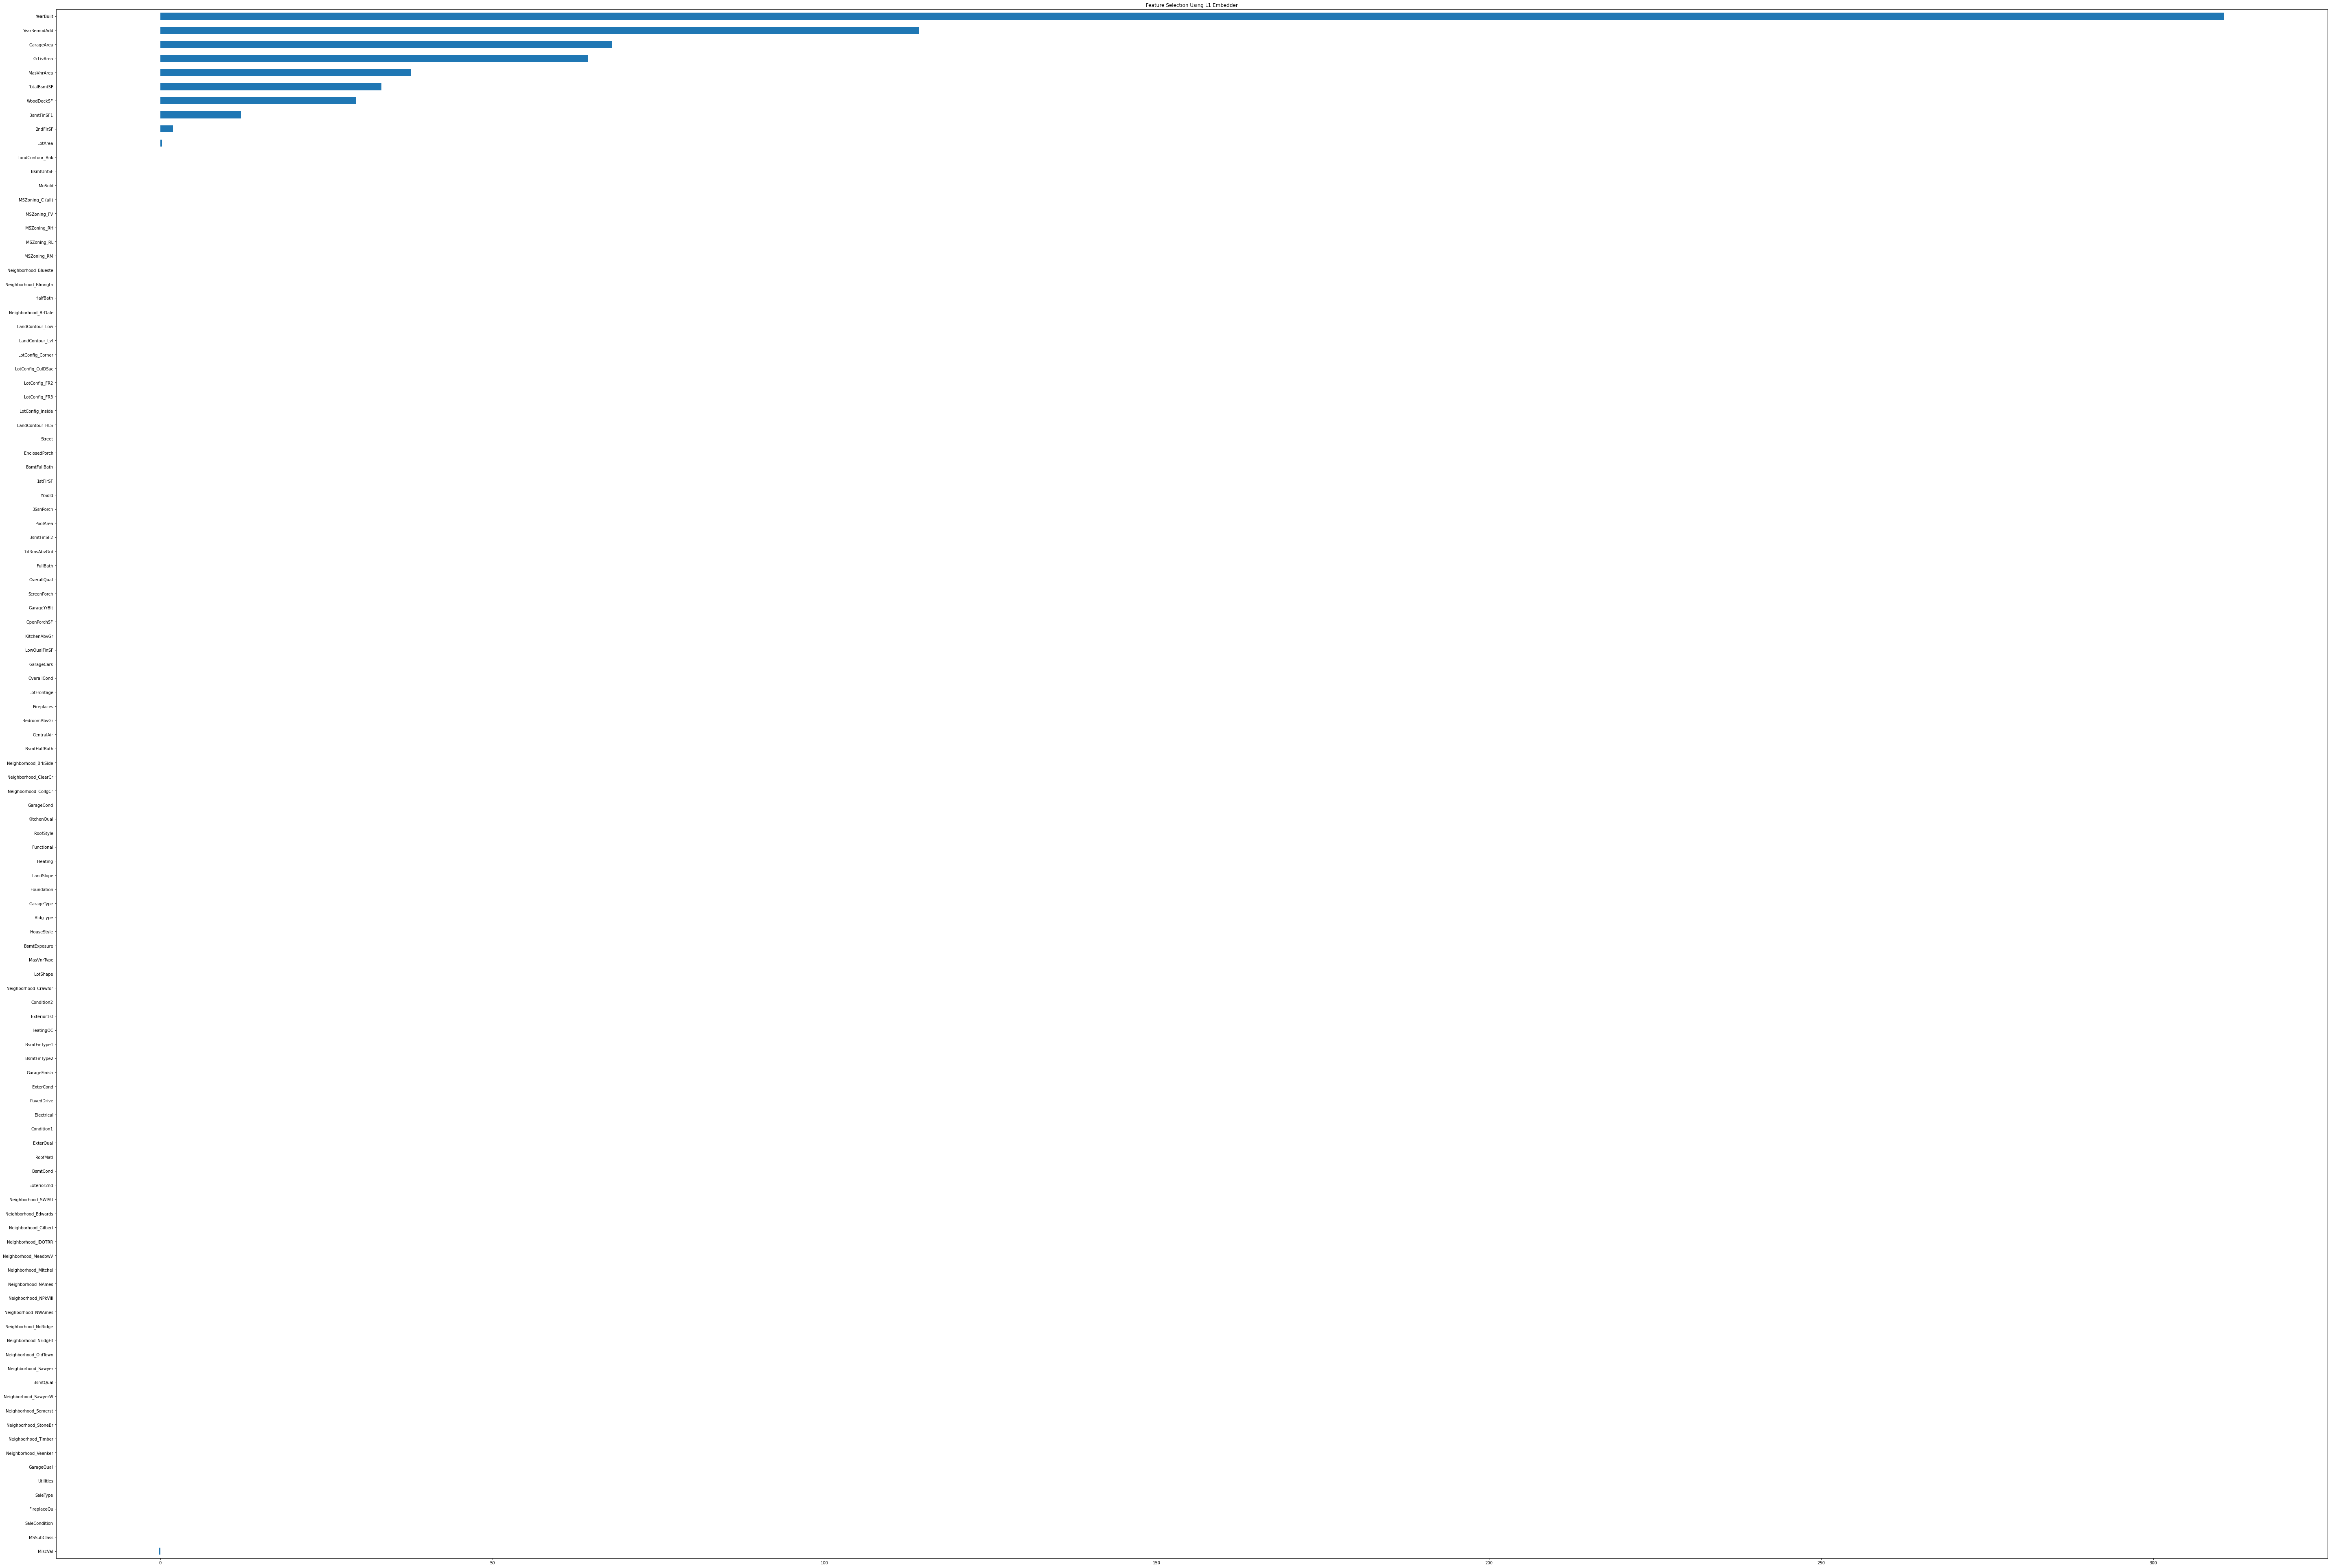

In [50]:
#print(regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=X_select.columns)

#print(coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(100.0,70.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

## 7.Train a regression model using PCA with 2 components

In [51]:
reg=LassoCV()

In [52]:
reg.fit(p_components,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [53]:
reg.coef_

array([0.25351582, 0.01758882])

In [54]:
reg.intercept_

1.8839274210994545e-16

### Example Plot

In [55]:
final_data_array=final_data.to_numpy()

In [56]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [57]:
w_1 = reg.coef_[0]
w_2 = reg.coef_[1]
b = reg.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [58]:
w_2

0.01758881627842865

Text(0.5, 0.92, 'Plane of Best Fit')

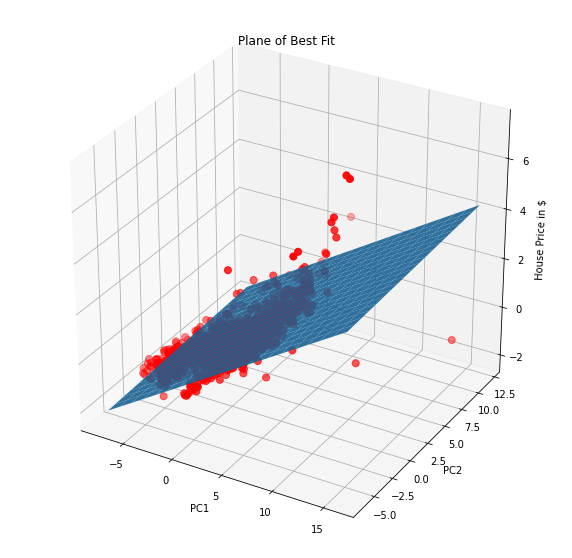

In [59]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")

### Splitting the data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(p_components,y,test_size=0.3,random_state=101)

In [61]:
y_train

array([[ 1.52462833],
       [-0.69786554],
       [ 0.65791868],
       ...,
       [-0.3767687 ],
       [ 0.99576293],
       [-0.60972131]])

In [62]:
y_test

array([[ 9.32802768e-01],
       [-4.52320895e-01],
       [-3.83064712e-01],
       [ 2.91604801e+00],
       [ 2.79467340e+00],
       [-8.55265960e-01],
       [-5.65649195e-01],
       [-4.62998939e-01],
       [-4.49172887e-01],
       [-5.78241228e-01],
       [-8.77302019e-01],
       [-5.15281061e-01],
       [-6.53793428e-01],
       [-1.43816079e-01],
       [-2.76032429e-01],
       [-2.88624462e-01],
       [-7.79713761e-01],
       [-6.78977494e-01],
       [-7.45598958e-02],
       [ 4.52253001e-01],
       [-3.26400562e-01],
       [-1.83870376e+00],
       [-2.16733560e-02],
       [-3.95656745e-01],
       [ 8.44658535e-01],
       [-2.63440395e-01],
       [-6.97865544e-01],
       [-2.94920479e-01],
       [-1.95443416e-01],
       [-1.10710663e+00],
       [ 3.47273220e-01],
       [-1.56408112e-01],
       [-8.71519291e-02],
       [ 1.37352393e+00],
       [-1.78329881e+00],
       [-8.94301264e-01],
       [ 2.58550714e+00],
       [ 2.40240937e-01],
       [-6.5

### Train a regression model

In [63]:
LinearRegression=linear_model.LinearRegression()
LinearRegression.fit(X_train , y_train)
accuracy = LinearRegression.score(X_test , y_test)
result=[accuracy]
result

[0.6681421734700494]